In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

2023-05-26 02:01:49.310769: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 02:01:49.602948: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 02:01:49.607305: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 02:01:51.107569: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Modelo 1

In [ ]:
xs = pd.read_csv('xs_1.csv', header=None).T
tau = pd.read_csv('tau_1.csv', header=None).T

display(xs)
display(tau)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xs, tau, test_size=0.3)

In [ ]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(4)
])

model_1.compile(loss='mae',
              optimizer='adam',
              metrics=['mae'])

history_1 = model_1.fit(tf.squeeze(X_train), y_train, epochs=15)

In [ ]:
plt.style.use('seaborn-v0_8')
pd.DataFrame(history_1.history).plot()

In [ ]:
model_1.evaluate(X_test, y_test)

# Modelo 2

In [2]:
xs = []
for i in range(100):
    xs.append(
        pd.read_csv(f'xs_{i+1}.csv', header=None).T.rename(columns={
            0: 'x.',
            1: 'y.',
            2: 'z.',
            3: 'phi.',
            4: 'theta.',
            5: 'psi.',
            6: 'x',
            7: 'y',
            8: 'z',
            9: 'phi',
            10: 'theta',
            11: 'psi',
        })
    )

tau = []
for i in range(100):
    tau.append(pd.read_csv(f'tau_{i+1}.csv', header=None).T)

In [3]:
len(xs), len(tau)

(100, 100)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(xs, tau, test_size=0.3)

In [5]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(4)
])

model_2.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

history_2 = model_2.fit(np.stack(X_train),np.stack(y_train), epochs=150)

2023-05-26 02:04:44.419264: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-26 02:04:44.657790: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-05-26 02:04:45.490948: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 84003360 exceeds 10% of free system memory.
2023-05-26 02:04:45.749717: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 28001120 exceeds 10% of free sys

Epoch 1/150


2023-05-26 02:04:47.194893: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38401536 exceeds 10% of free system memory.
2023-05-26 02:04:47.195805: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38401536 exceeds 10% of free system memory.
2023-05-26 02:04:47.208554: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38401536 exceeds 10% of free system memory.


3/3 [==============================] - 19s 640ms/step - loss: 116.6340 - mae: 5.5516
Epoch 2/150
3/3 [==============================] - 2s 407ms/step - loss: 114.5835 - mae: 5.4971
Epoch 3/150
3/3 [==============================] - 1s 377ms/step - loss: 112.4573 - mae: 5.4466
Epoch 4/150
3/3 [==============================] - 1s 390ms/step - loss: 110.2816 - mae: 5.4034
Epoch 5/150
3/3 [==============================] - 1s 369ms/step - loss: 108.1565 - mae: 5.3624
Epoch 6/150
3/3 [==============================] - 1s 372ms/step - loss: 106.0049 - mae: 5.3174
Epoch 7/150
3/3 [==============================] - 1s 354ms/step - loss: 103.7400 - mae: 5.2662
Epoch 8/150
3/3 [==============================] - 1s 331ms/step - loss: 101.2628 - mae: 5.2052
Epoch 9/150
3/3 [==============================] - 1s 335ms/step - loss: 98.5194 - mae: 5.1314
Epoch 10/150
3/3 [==============================] - 1s 349ms/step - loss: 95.4996 - mae: 5.0445
Epoch 11/150
3/3 [==============================] - 

<Axes: >

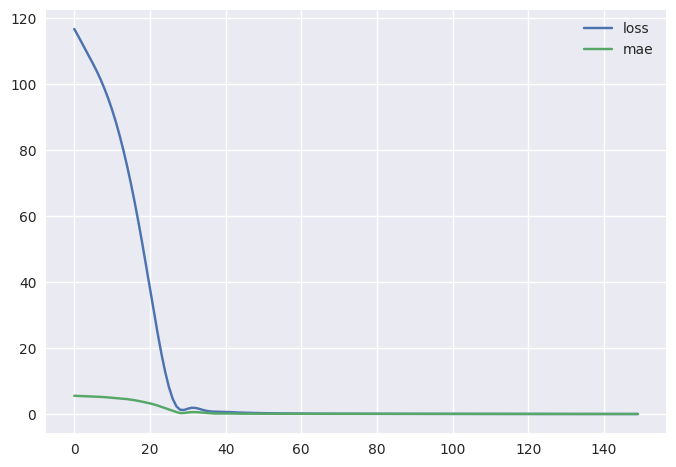

In [6]:
plt.style.use('seaborn-v0_8')
pd.DataFrame(history_2.history).plot()

In [7]:
np.stack(X_train)

array([[[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  5.0000e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  5.0000e-01],
        [ 0.0000e+00,  0.0000e+00,  6.6000e-03, ...,  0.0000e+00,
          0.0000e+00,  4.9998e-01],
        ...,
        [ 5.0991e-02,  2.6935e-01,  5.0175e-09, ..., -2.6835e-03,
         -1.3861e-02, -9.4151e-07],
        [ 5.0719e-02,  2.6941e-01,  5.0373e-09, ..., -2.6697e-03,
         -1.3864e-02, -9.3787e-07],
        [ 5.0447e-02,  2.6946e-01,  5.0571e-09, ..., -2.6560e-03,
         -1.3867e-02, -9.3424e-07]],

       [[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  5.0000e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  5.0000e-01],
        [ 0.0000e+00,  0.0000e+00,  6.6000e-03, ...,  0.0000e+00,
          0.0000e+00,  4.9998e-01],
        ...,
        [ 5.0991e-02,  2.6935e-01,  5.0175e-09, ..., -